In [82]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# **Problema 1**
---

Desarrolle una funcion la cual reciba dos parametros, una imagen y un entero llamado color, la funcion debe devolver una imagen la cual tenga activos los canales de color segun los siguientes puntos:

- Si el parametro color vale 1, la imagen debe mostrar activos unicamente el color azul.
- Si el parametro color vale 2, la imagen debe mostrar activos unicamente el color verde.
- Si el parametro color vale 3, la imagen debe mostrar activos unicamente el color rojo.
- Si el parametro color vale 10, la imagen debe mostrar activos unicamente los colores rojo y
verde.
- Si el parametro color vale 20, la imagen debe mostrar activos unicamente los colores verde y
azul.
- Si el parametro color vale 30, la imagen debe mostrar activos unicamente los colores azul y
rojo.

In [83]:
def save_and_show_image(path, image, cmap = 'viridis'):
  cv2.imwrite(path, image)
  new_img = cv2.imread(path)
  new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
  plt.imshow(new_img, cmap)
  plt.show()
  
def select_color_channels(image, input, path):
  blue, green, red = cv2.split(image)
  zeros = np.zeros(blue.shape, np.uint8)
  
  blueBGR = cv2.merge([blue,zeros,zeros])
  greenBGR = cv2.merge([zeros,green,zeros])
  redBGR = cv2.merge([zeros,zeros,red])
  green_red_BGR = cv2.merge([zeros,green,red])
  blue_green_BGR = cv2.merge([blue,green,zeros])
  blue_red_BGR = cv2.merge([blue,zeros,red])
  
  match input:
    case 1:
      save_and_show_image(path, blueBGR)
    case 2:
      save_and_show_image(path, greenBGR)
    case 3:
      save_and_show_image(path, redBGR)
    case 10:
      save_and_show_image(path, green_red_BGR)
    case 20:
      save_and_show_image(path, blue_green_BGR)
    case 30:
      save_and_show_image(path, blue_red_BGR)
    case _:
      raise ValueError("Valor no encontrado")

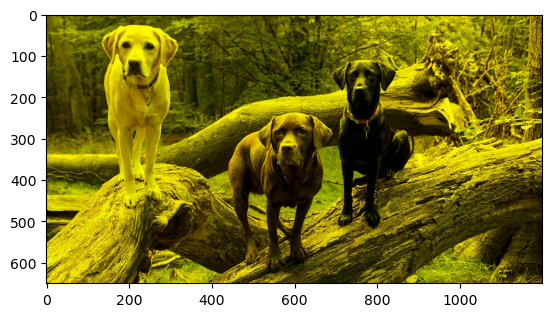

In [84]:
path = 'ej1/labs.jpg'
output_path = 'ej1/output.jpg'
img = cv2.imread(path)
select_color_channels(img, 10, output_path)

# **Problema 2**
---

En el .zip del laboratorio se le compartio un conjunto de imagenes en escala de grises (imagen1, imagen2, perro) estas imagenes fueron creadas utilizando una escala de grises en 3D, cree una funcion que dadas las 3 imagenes se construya la imagen original a color.

In [85]:
def gray_to_color(blue_gray, green_gray, red_gray, path):
  blue_values = blue_gray[:,:,0]
  green_values = green_gray[:,:,0]
  red_values = red_gray[:,:,0]
  
  restoredBGR = cv2.merge([blue_values,green_values,red_values])
  
  save_and_show_image(path, restoredBGR)

### Imagen 1

In [86]:
img1_blue = cv2.imread('imagen1/imagen1_salida_gray_azul.jpg')
img1_green = cv2.imread('imagen1/imagen1_salida_gray_verde.jpg')
img1_red = cv2.imread('imagen1/imagen1_salida_gray_rojo.jpg')

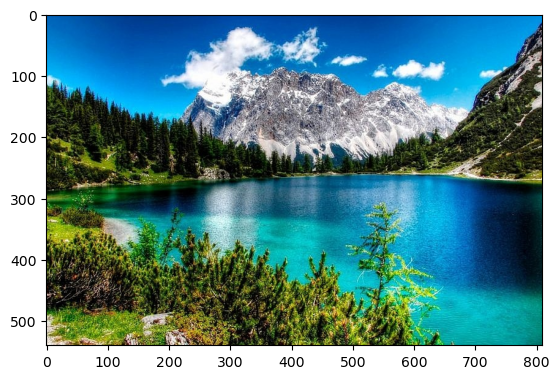

In [87]:
output_path = 'ej2/img1.jpg'
gray_to_color(img1_blue, img1_green, img1_red, output_path)

### Imagen 2

In [88]:
img2_blue = cv2.imread('imagen2/imagen2_salida_gray_azul.jpg')
img2_green = cv2.imread('imagen2/imagen2_salida_gray_verde.jpg')
img2_red = cv2.imread('imagen2/imagen2_salida_gray_rojo.jpg')

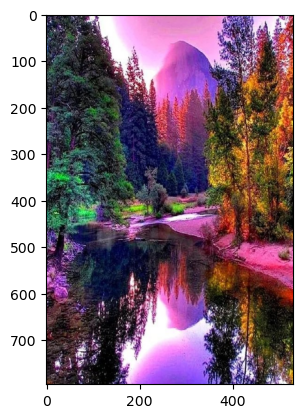

In [89]:
output_path = 'ej2/img2.jpg'
gray_to_color(img2_blue, img2_green, img2_red, output_path)

### Imagen 3

In [90]:
perro_blue = cv2.imread('perro/perro_salida_gray_azul.jpg')
perro_green = cv2.imread('perro/perro_salida_gray_verde.jpg')
perro_red = cv2.imread('perro/perro_salida_gray_rojo.jpg')

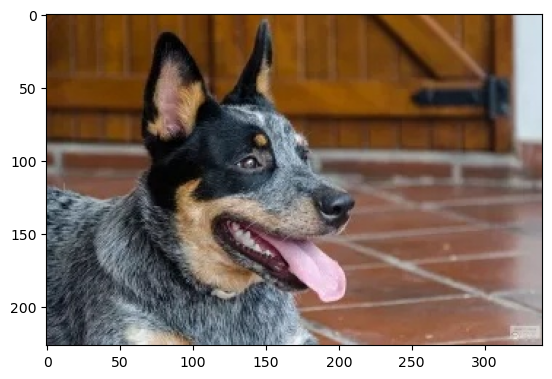

In [91]:
output_path = 'ej2/img3.jpg'
gray_to_color(perro_blue, perro_green, perro_red, output_path)

# **Problema 3**
---

Cree una funcion que dada una imagen cree una escala de grises en tres dimensiones, tome en cuenta que su funcion debe crear 3 imagenes como salida. Para entregar este ejercicio debe incluir una las imagenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la
imagen del Problema #2.

In [92]:
def colors_to_gray_3D(image):
  blue, green, red = cv2.split(image)
  
  blue_gray= cv2.merge([blue,blue,blue])
  green_gray = cv2.merge([green,green,green])
  red_gray = cv2.merge([red,red,red])
  
  return blue_gray, green_gray, red_gray

In [93]:
img_colored = cv2.imread('ej3/color_labs.jpg')
blue_gray, green_gray, red_gray = colors_to_gray_3D(img_colored)

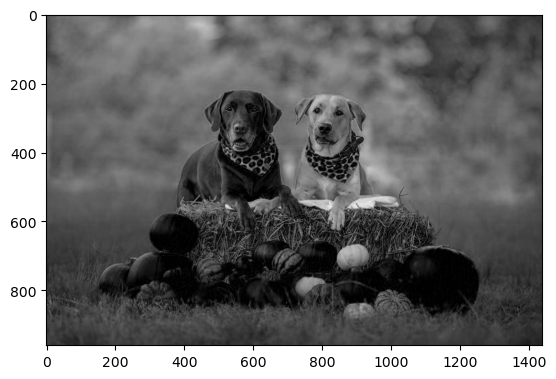

In [94]:
output_path = 'ej3/output_gray_blue.jpg'
save_and_show_image(output_path, blue_gray)

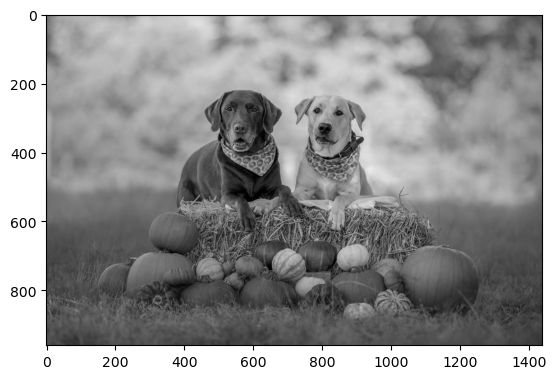

In [95]:
output_path = 'ej3/output_gray_green.jpg'
save_and_show_image(output_path, green_gray)

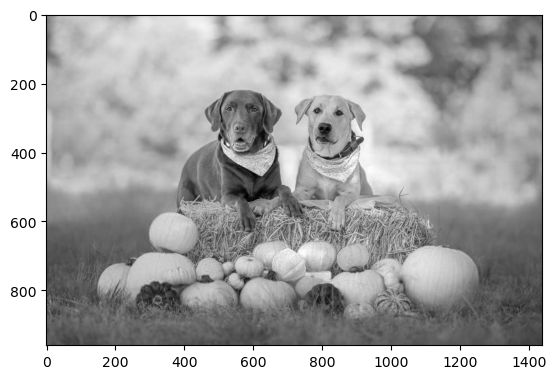

In [96]:
output_path = 'ej3/output_gray_red.jpg'
save_and_show_image(output_path, red_gray)

# **Problema 4**
---

Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funciones de opencv), sus histogramas deben incluir una linea vertical la cual muestre el valor de la media de la distribucion.

In [97]:
def colors_to_gray_mean(path, image):
  img = np.mean(image, axis=2).astype(np.uint8)
  save_and_show_image(path, img)

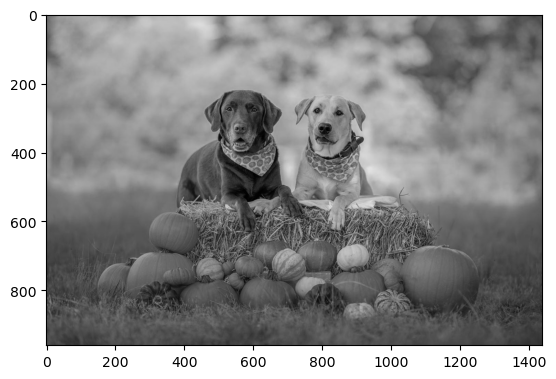

In [98]:
img_colored = cv2.imread('ej3/color_labs.jpg')
output_path = 'ej4/output_gray.jpg'
colors_to_gray_mean(output_path, img_colored)

In [99]:
# Crear histogramas
def create_color_histograms(image, gray_image):
    blue, green, red = cv2.split(image)
    
    # uso ravel para matriz a array, y solo me interesa sum, no los bordes
    hist_blue_np, _ = np.histogram(blue.ravel(), bins=256, range=(0, 256))
    hist_green_np, _ = np.histogram(green.ravel(), bins=256, range=(0, 256))
    hist_red_np, _ = np.histogram(red.ravel(), bins=256, range=(0, 256))
    hist_gray_np, _ = np.histogram(gray_image.ravel(), bins=256, range=(0, 256))
    
    plt.subplot(2, 2, 1)
    plt.title("Blue - Numpy")
    plt.plot(hist_blue_np, color="blue")
    
    plt.subplot(2, 2, 2)
    plt.title("Green - Numpy")
    plt.plot(hist_green_np, color="green")
    
    plt.subplot(2, 2, 3)
    plt.title("Red - Numpy")
    plt.plot(hist_red_np, color="red")
    
    plt.subplot(2, 2, 4)
    plt.title("Gray - Numpy")
    plt.plot(hist_gray_np, color="gray")
    
    plt.tight_layout()
    plt.show()



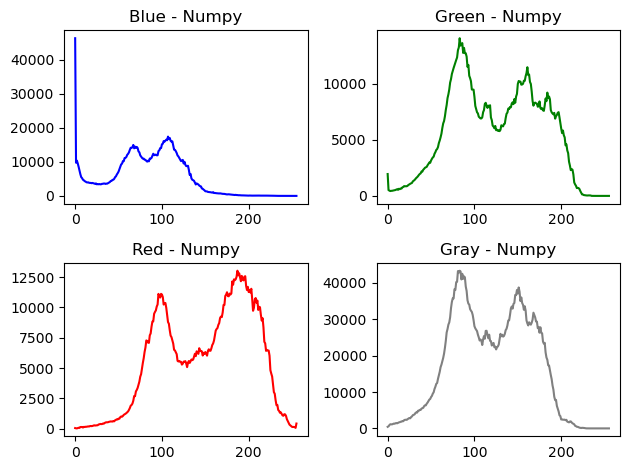

In [100]:
img_gray = cv2.imread(output_path)
create_color_histograms(img_colored, img_gray)

# **Problema 5**
---

Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una funcion que dada una imagen, realice una escala de grises ponderada (notar que no existe una solucion unica).

In [109]:
def rgb_to_weighted_grayscale(path, image):
    grayscale = 0.299 * image[:, :, 2] + 0.587 * image[:, :, 1] + 0.114 * image[:, :, 0].astype(np.uint8)
    save_and_show_image(path, grayscale)
    

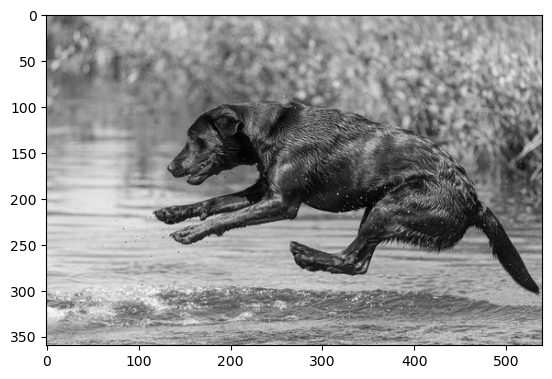

In [111]:
img_colored = cv2.imread('ej5/color_lab.jpg')
output_path = 'ej5/output_gray.jpg'
rgb_to_weighted_grayscale(output_path, img_colored)

# **Problema 6**
---

Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho espacio, para entregar este ejercicio puede hacerlo por medio de Markdown en el mismo Notebook donde trabajo los demas ejercicios.

HSV es un modelo de color cilíndrico que transforma los colores primarios RGB en dimensiones más fáciles de entender para los humanos. Estas dimensiones son tono, saturación y valor.

- Tono (Hue): Especifica el ángulo del color en el círculo de colores RGB. Un tono de 0° es rojo, 120° es verde y 240° es azul.
- Saturación (Saturation): Controla la cantidad de color. Un color con 100% de saturación es el más puro posible, mientras que un color con 0% de saturación es en escala de grises.
- Valor (Value): Controla el brillo del color. Un color con 0% de valor es negro puro, mientras que un color con 100% de valor no tiene negro mezclado.

Las tres dimensiones del modelo HSV son interdependientes:

Si el valor es 0%, el tono y la saturación no importan porque el color será negro.
Si la saturación es 0%, el tono no importa porque no hay color (será escala de grises).
Debido a que el tono es circular, el modelo HSV se representa mejor como un cilindro, donde todas las posibles mezclas de colores están dentro de los límites del cilindro